Get spreads on hyperliquid

Processing 1/14: BTC/USDT:USDT
Processing 2/14: OG/USDT:USDT
Processing 3/14: HUMA/USDT:USDT
Processing 4/14: SOON/USDT:USDT
Processing 5/14: B/USDT:USDT
Processing 6/14: NXPC/USDT:USDT
Processing 7/14: SKYAI/USDT:USDT
Processing 8/14: MERL/USDT:USDT
Processing 9/14: SOPH/USDT:USDT
Processing 10/14: A/USDT:USDT
Processing 11/14: AWE/USDT:USDT
Processing 12/14: AGT/USDT:USDT
Processing 13/14: ZKJ/USDT:USDT
Processing 14/14: HYPE/USDT:USDT


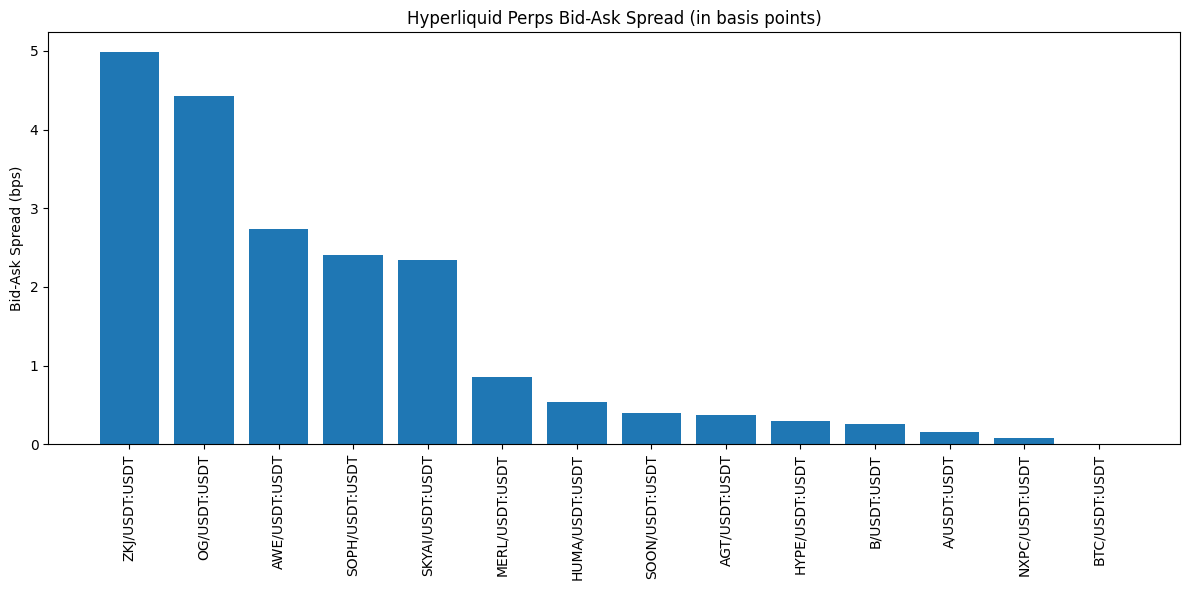

In [9]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Hyperliquid exchange
exchange = ccxt.binance()

# Load all markets
markets = exchange.load_markets()

# Filter for perpetual swaps only
# perps = {symbol: data for symbol, data in markets.items() if data.get('swap', False)}
symbols = ['BTC', 'OG', 'HUMA', 'SOON', 'B', 'NXPC', 'SKYAI', 'MERL', 'SOPH', 'A',
       'AWE', 'AGT', 'ZKJ', 'HYPE']
perps = [s + '/USDT:USDT' for s in symbols]

# Gather bid-ask spreads in bps
spreads = []
for i, symbol in enumerate(perps):
    print(f"Processing {i + 1}/{len(perps)}: {symbol}")
    try:
        ob = exchange.fetch_order_book(symbol)
        bid = ob['bids'][0][0] if ob['bids'] else None
        ask = ob['asks'][0][0] if ob['asks'] else None
        if bid is not None and ask is not None:
            mid = (ask + bid) / 2
            spread_bps = ((ask - bid) / mid) * 10_000
            spreads.append({'symbol': symbol, 'spread_bps': spread_bps})
    except Exception as e:
        print(f"Error for {symbol}: {e}")

# Convert to DataFrame and sort
df = pd.DataFrame(spreads).sort_values(by='spread_bps', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df['symbol'], df['spread_bps'])
plt.xticks(rotation=90)
plt.ylabel('Bid-Ask Spread (bps)')
plt.title('Hyperliquid Perps Bid-Ask Spread (in basis points)')
plt.tight_layout()
plt.show()


In [10]:
df


,symbol,spread_bps
12,ZKJ/USDT:USDT,4.986288
1,OG/USDT:USDT,4.426737
10,AWE/USDT:USDT,2.742262
8,SOPH/USDT:USDT,2.411915
6,SKYAI/USDT:USDT,2.341646
7,MERL/USDT:USDT,0.848716
2,HUMA/USDT:USDT,0.539316
3,SOON/USDT:USDT,0.398700
11,AGT/USDT:USDT,0.366993
13,HYPE/USDT:USDT,0.301336
